In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snsW
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset
file_path = "/content/airplane_price_dataset (1).csv"
df = pd.read_csv(file_path)

# Rename columns for better readability
df.columns = ['Model', 'Manufacturing_Year', 'Engine_Count', 'Engine_Type', 'Capacity',
              'Range_km', 'Fuel_Consumption_Lph', 'Hourly_Maintenance_Cost', 'Age',
              'Sales_Region', 'Price']


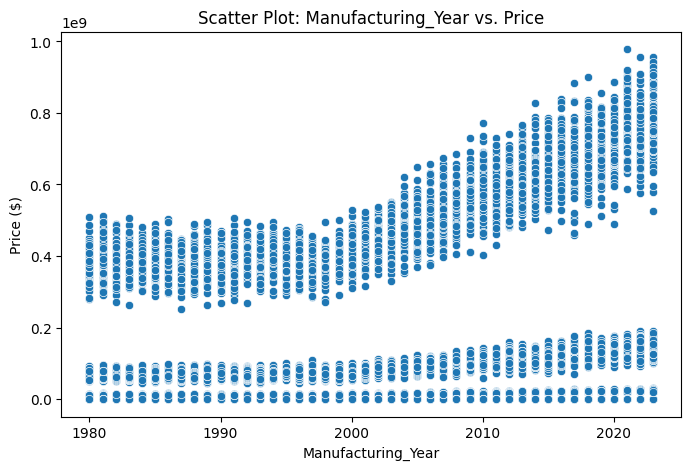

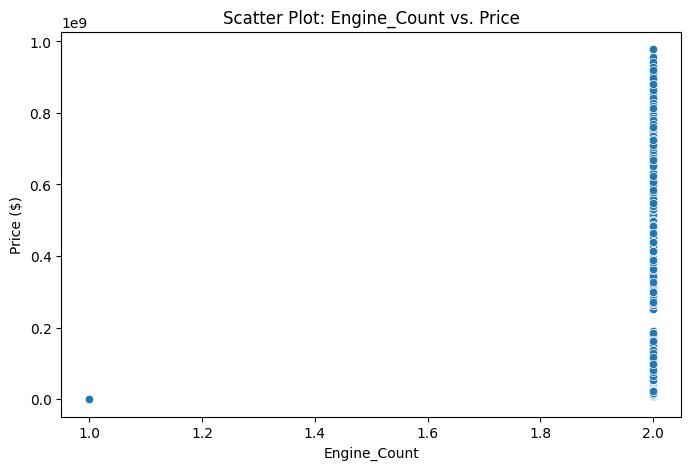

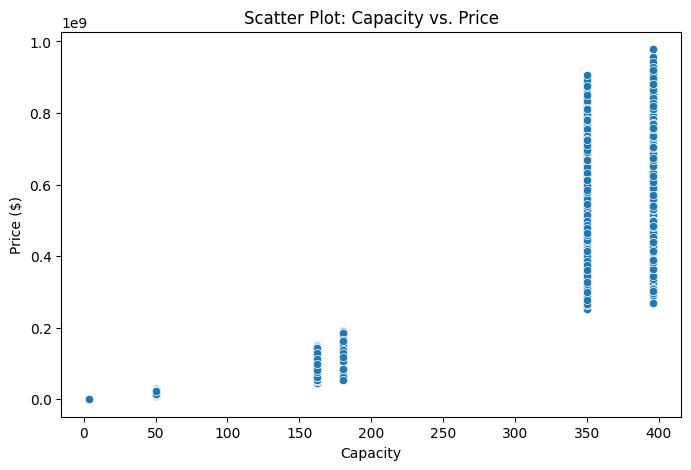

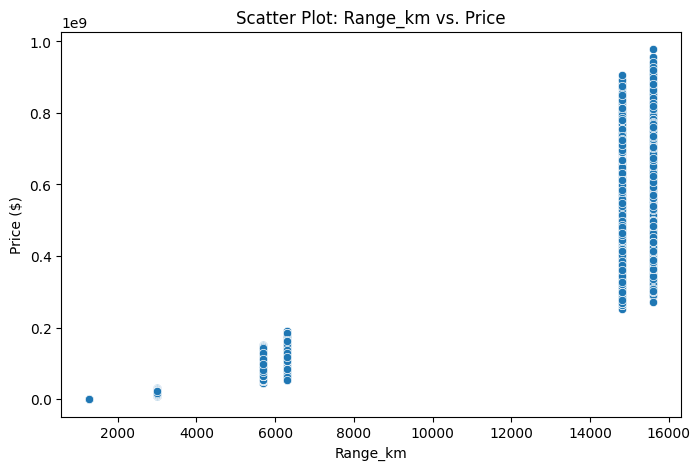

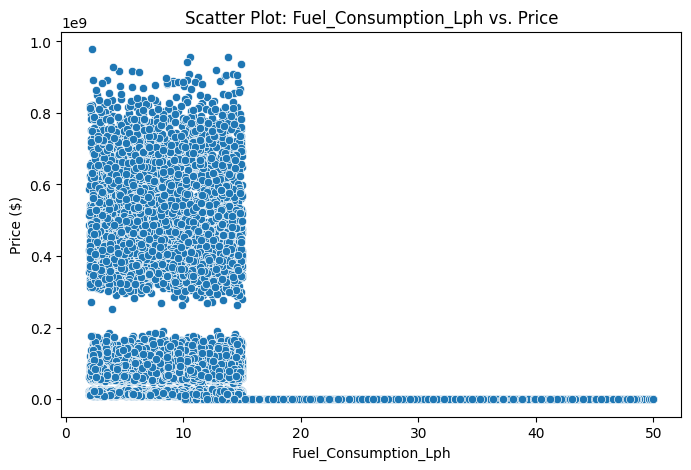

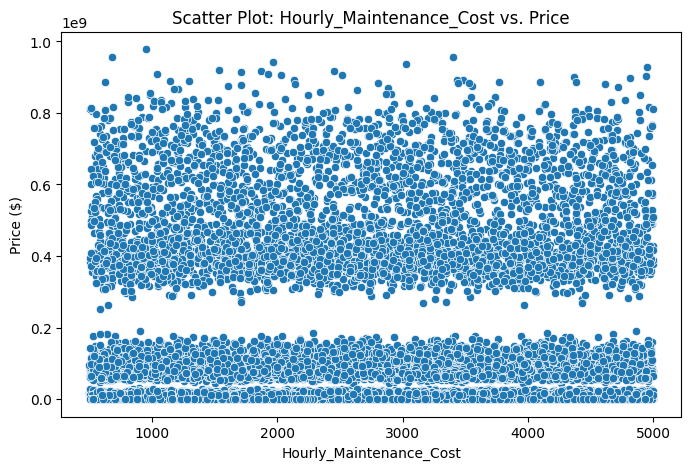

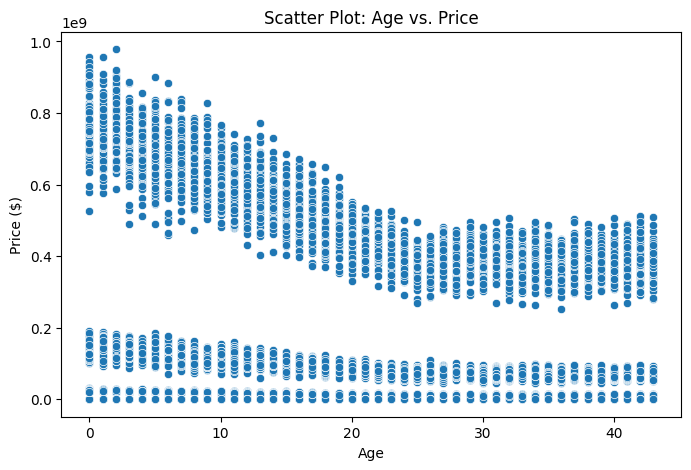

In [ ]:
#Scatter Plot
# List of numerical columns to compare with Price
num_columns = ['Manufacturing_Year', 'Engine_Count', 'Capacity', 'Range_km',
               'Fuel_Consumption_Lph', 'Hourly_Maintenance_Cost', 'Age']

# Generate scatter plots
for col in num_columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[col], y=df['Price'])
    plt.title(f'Scatter Plot: {col} vs. Price')
    plt.xlabel(col)
    plt.ylabel('Price ($)')
    plt.show()


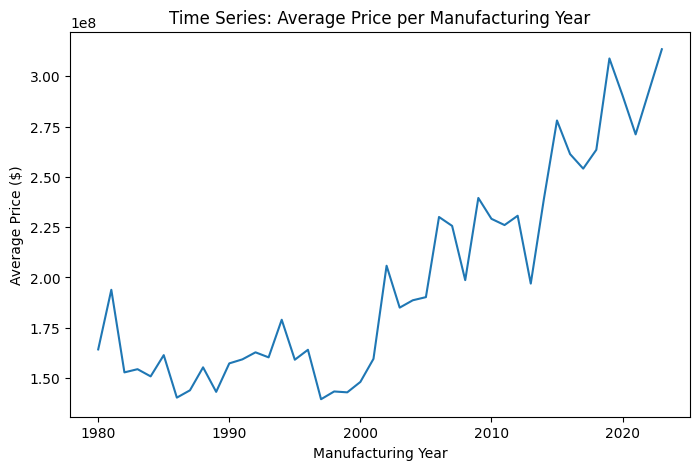

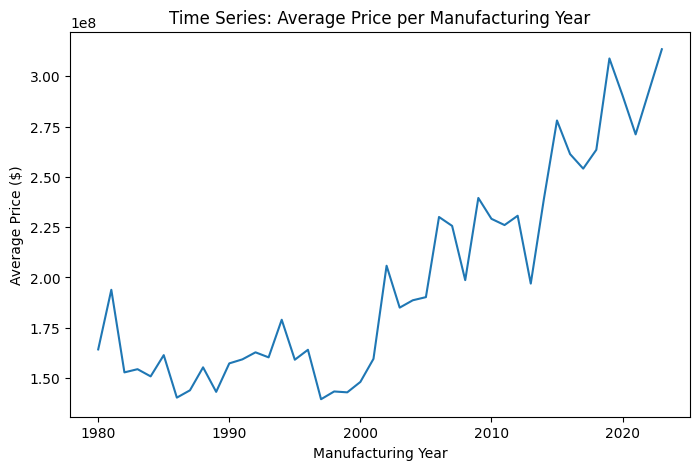

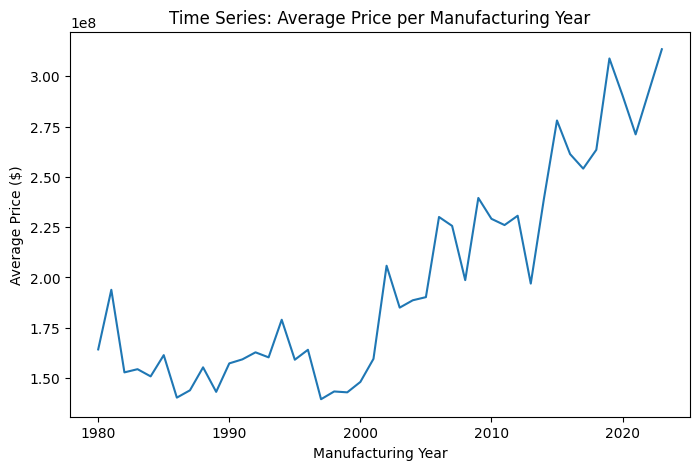

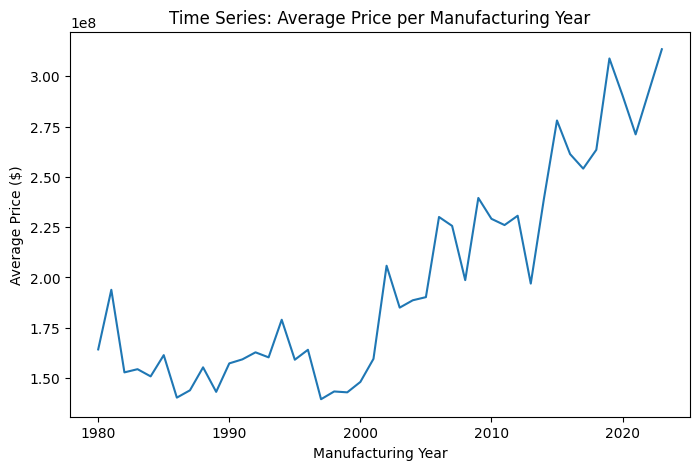

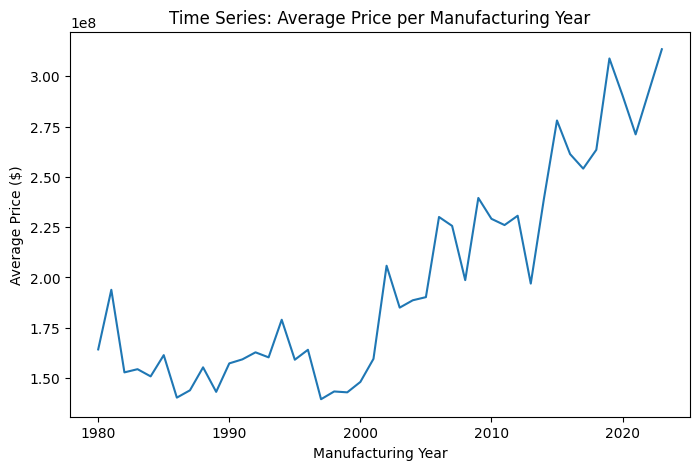

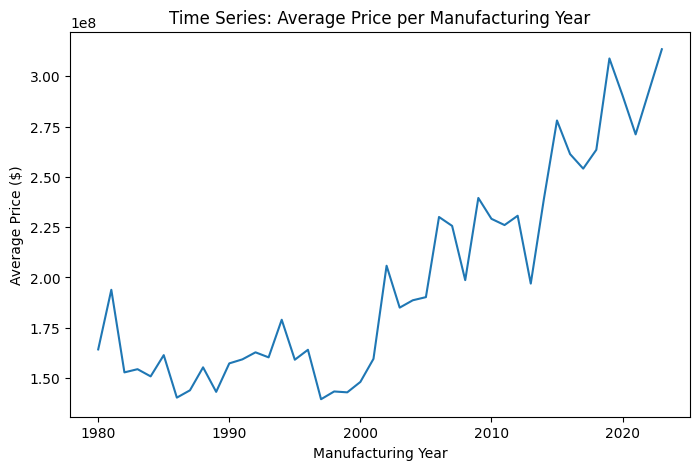

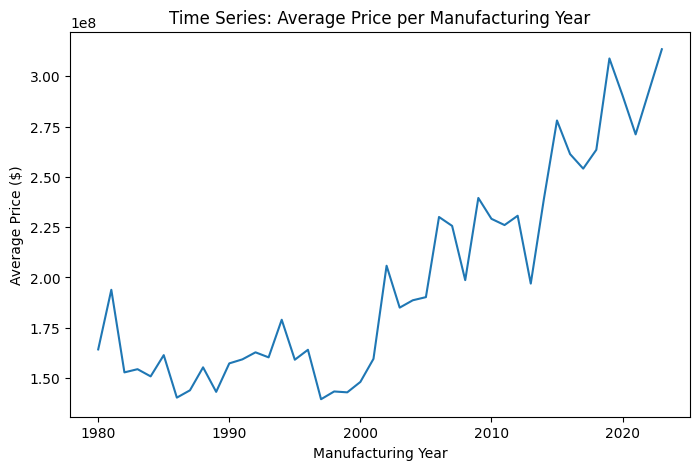

In [ ]:
# Time Series Plot: Average Price per Manufacturing Year
num_columns = ['Manufacturing_Year', 'Engine_Count', 'Capacity', 'Range_km',
               'Fuel_Consumption_Lph', 'Hourly_Maintenance_Cost', 'Age']
for col in num_columns:
    plt.figure(figsize=(8, 5))
    df_grouped = df.groupby('Manufacturing_Year')['Price'].mean()
    df_grouped.plot()
    plt.title('Time Series: Average Price per Manufacturing Year')
    plt.xlabel('Manufacturing Year')
    plt.ylabel('Average Price ($)')
    plt.show()

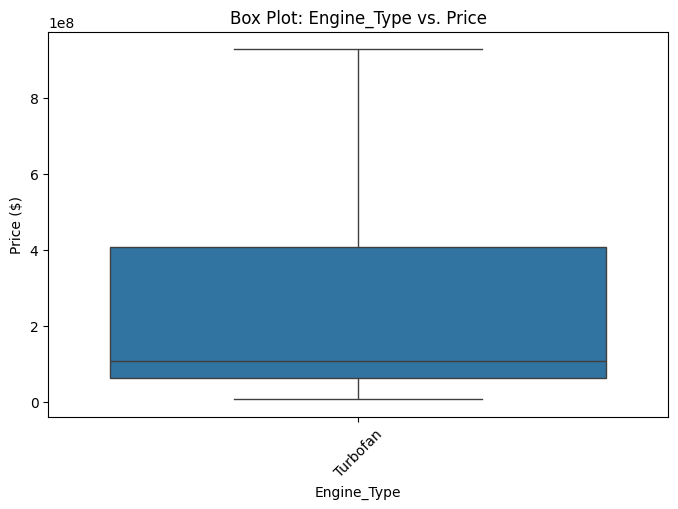

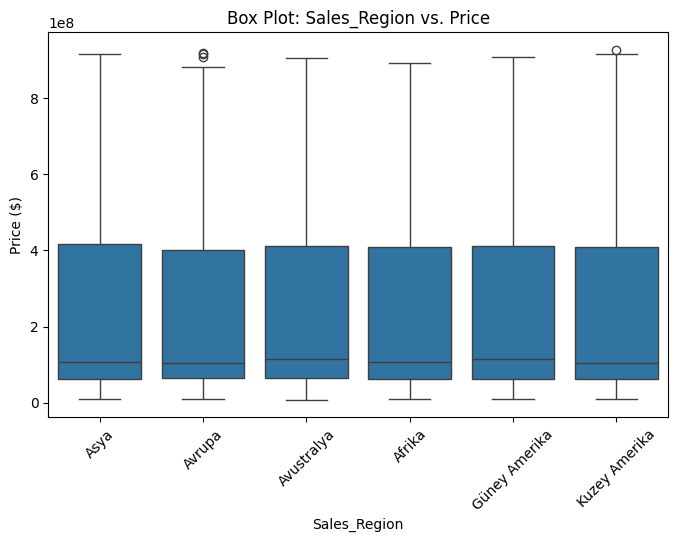

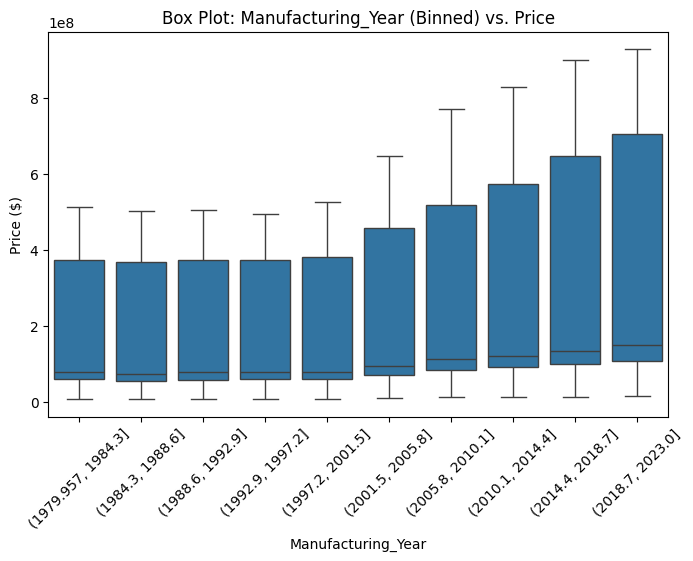

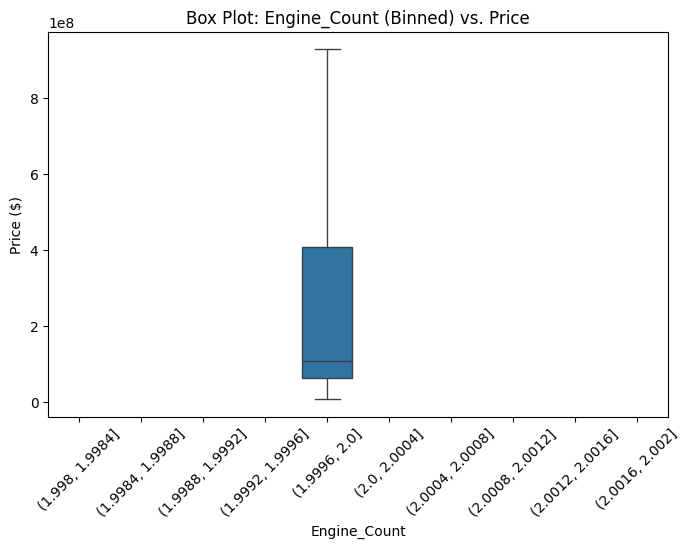

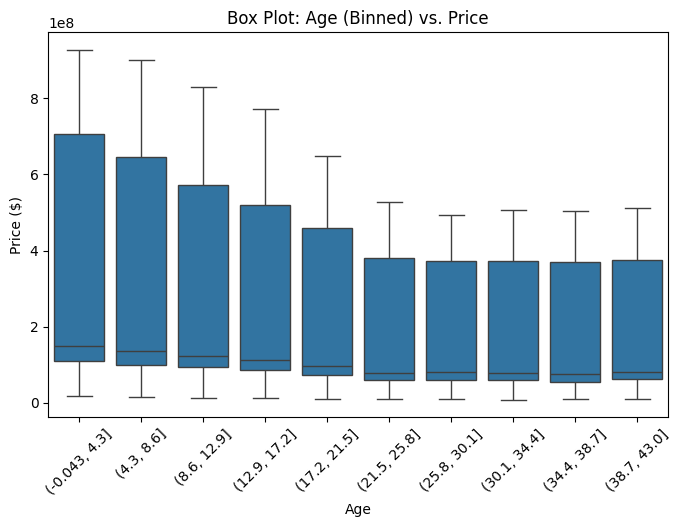

In [ ]:
# Rename columns for readability
df.columns = ['Model', 'Manufacturing_Year', 'Engine_Count', 'Engine_Type', 'Capacity',
              'Range_km', 'Fuel_Consumption_Lph', 'Hourly_Maintenance_Cost', 'Age',
              'Sales_Region', 'Price']

# Outlier Removal using IQR for all numerical columns
num_columns = ['Manufacturing_Year', 'Engine_Count', 'Capacity', 'Range_km',
               'Fuel_Consumption_Lph', 'Hourly_Maintenance_Cost', 'Age', 'Price']

df_cleaned = df.copy()  # Copy the dataset before removing outliers

for col in num_columns:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    df_cleaned = df_cleaned[(df_cleaned[col] >= (Q1 - 1.5 * IQR)) & (df_cleaned[col] <= (Q3 + 1.5 * IQR))]

# Generate box plots for categorical variables
categorical_columns = ['Engine_Type', 'Sales_Region']

for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df_cleaned[col], y=df_cleaned['Price'])
    plt.xticks(rotation=45)
    plt.title(f'Box Plot: {col} vs. Price')
    plt.xlabel(col)
    plt.ylabel('Price ($)')
    plt.show()

# Generate box plots for numerical variables by grouping into bins
for col in ['Manufacturing_Year', 'Engine_Count', 'Age']:
    df_cleaned[f'{col}_bins'] = pd.cut(df_cleaned[col], bins=10)  # Create bins for better visualization

    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df_cleaned[f'{col}_bins'], y=df_cleaned['Price'])
    plt.xticks(rotation=45)
    plt.title(f'Box Plot: {col} (Binned) vs. Price')
    plt.xlabel(col)
    plt.ylabel('Price ($)')
    plt.show()


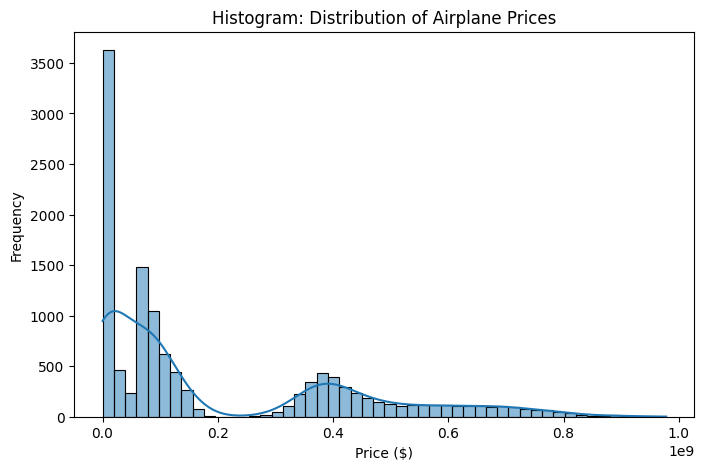

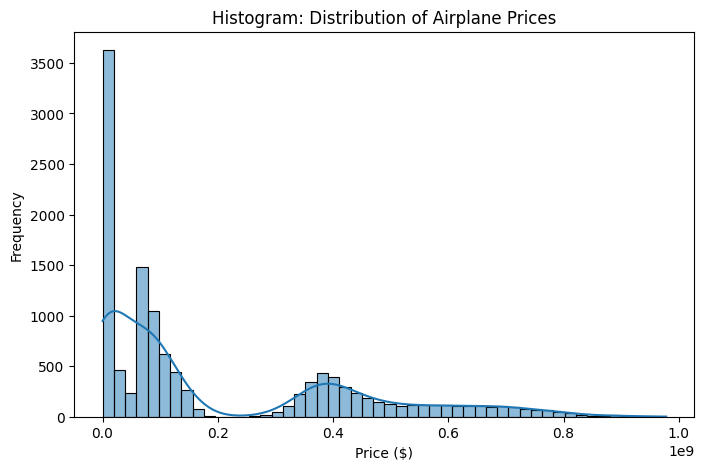

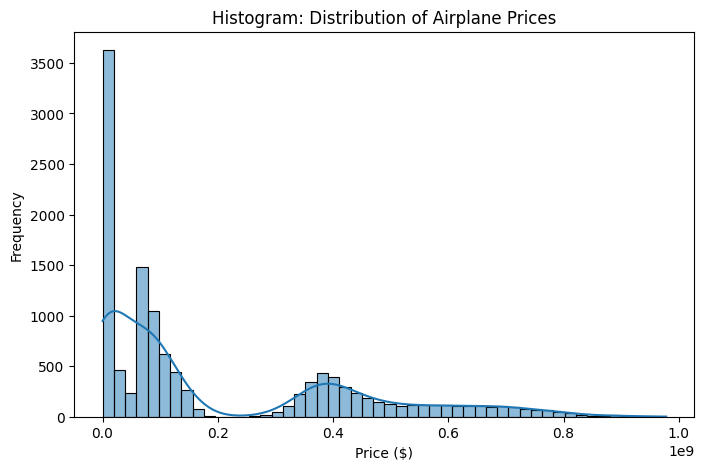

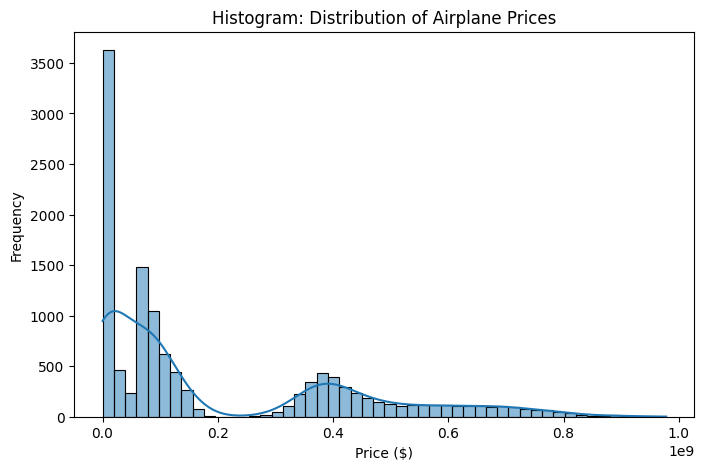

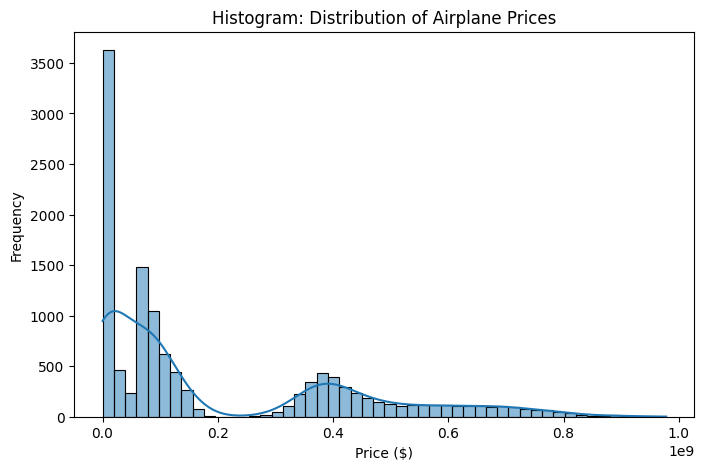

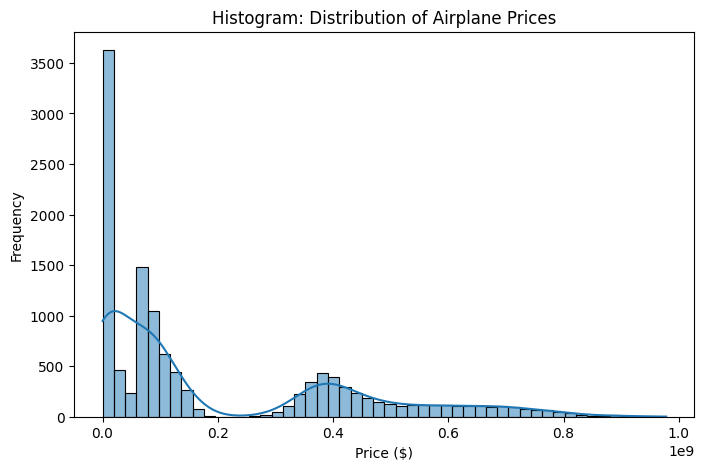

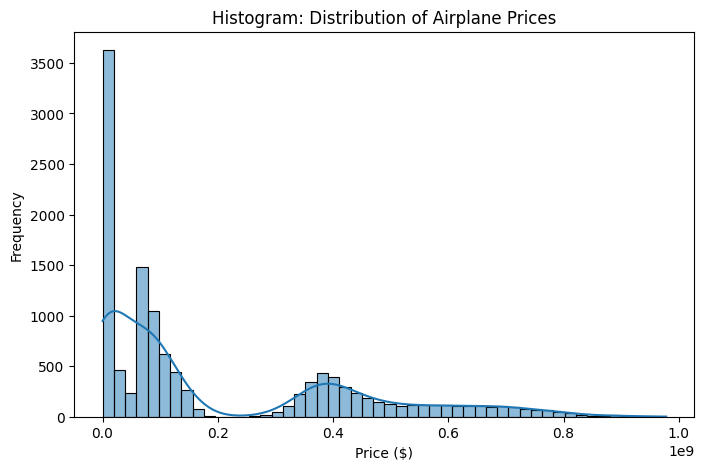

In [ ]:
# Histogram: Distribution of Prices
num_columns = ['Manufacturing_Year', 'Engine_Count', 'Capacity', 'Range_km',
               'Fuel_Consumption_Lph', 'Hourly_Maintenance_Cost', 'Age']
for col in num_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df['Price'], bins=50, kde=True)
    plt.title('Histogram: Distribution of Airplane Prices')
    plt.xlabel('Price ($)')
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
from scipy.stats import skew

# Select numerical columns
num_columns = ['Manufacturing_Year', 'Engine_Count', 'Capacity', 'Range_km',
               'Fuel_Consumption_Lph', 'Hourly_Maintenance_Cost', 'Age', 'Price']

# Calculate and print skewness
print("Skewness of numerical columns:")
for col in num_columns:
    col_skew = skew(df[col], nan_policy='omit')
    print(f"{col}: {col_skew:.2f}")

Skewness of numerical columns:
Manufacturing_Year: 0.02
Engine_Count: -1.81
Capacity: 0.20
Range_km: 0.43
Fuel_Consumption_Lph: 2.06
Hourly_Maintenance_Cost: 0.01
Age: -0.02
Price: 1.06


In [ ]:
from scipy.stats import kurtosis

# Calculate and print kurtosis
print("\nKurtosis of numerical columns:")
for col in num_columns:
    col_kurt = kurtosis(df[col], nan_policy='omit')
    print(f"{col}: {col_kurt:.2f}")


Kurtosis of numerical columns:
Manufacturing_Year: -1.22
Engine_Count: 1.27
Capacity: -1.40
Range_km: -1.46
Fuel_Consumption_Lph: 4.03
Hourly_Maintenance_Cost: -1.18
Age: -1.22
Price: -0.12



Model Performance:
Linear Regression    MAE: 50741962.01  R²: 0.91
Random Forest        MAE: 20496300.38  R²: 0.97
Gradient Boosting    MAE: 18850337.37  R²: 0.98


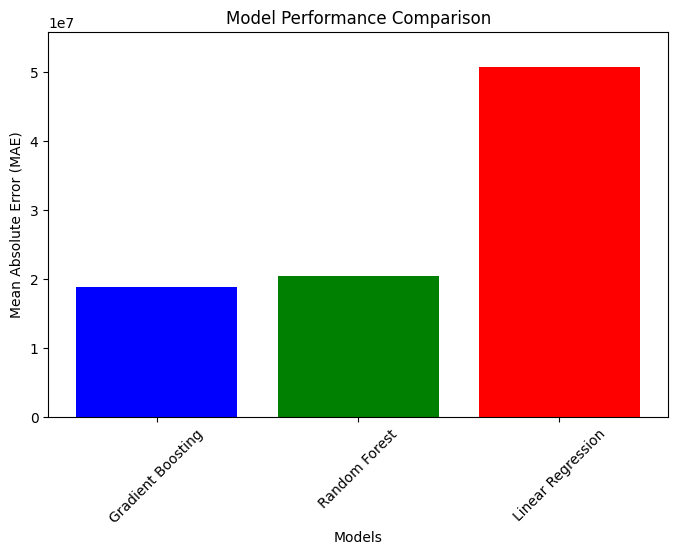

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Define features and target
features = ['Age', 'Engine_Count', 'Capacity', 'Range_km', 'Fuel_Consumption_Lph', 'Hourly_Maintenance_Cost']
X = df_cleaned[features]
y = df_cleaned['Price']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Train models and evaluate
results = []
print("\nModel Performance:")
print("=" * 50)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append((name, mae, r2))
    print(f"{name:<20} MAE: {mae:.2f}  R²: {r2:.2f}")

# Sort models by lowest MAE (better performance)
results.sort(key=lambda x: x[1])

# Extract values for plotting
model_names, maes, r2_scores = zip(*results)

# Plot MAE comparison
plt.figure(figsize=(8, 5))
plt.bar(model_names, maes, color=['blue', 'green', 'red'])
plt.xlabel("Models")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Model Performance Comparison")
plt.ylim(0, max(maes) * 1.1)
plt.xticks(rotation=45)
plt.show()


In [ ]:

import numpy as np
from statsmodels.stats.weightstats import ztest

# Hypothetical population mean (adjust as needed)
pop_mean = 5e7  # Example: $50 million

# Extract the 'Fiyat ($)' column
prices = df["Fiyat ($)"].dropna()

# Perform one-sample Z-test
z_stat, p_value = ztest(prices, value=pop_mean)

# Display results
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The mean price significantly differs from the population mean.")
else:
    print("Fail to reject the null hypothesis: No significant difference from the population mean.")
